In [1]:
import xarray as xr

In [2]:
dat = xr.load_dataset('data/steinmetz_2017-06-16_Hench.nc')
dat

<xarray.Dataset>
Dimensions:             (trial: 482, time: 250, cell: 788,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 13, spike_id: 3666676)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 477 478 479 480 481 482
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 783 784 785 786 787 788
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'LSr' 'ORBm' ... 'VISam' 'VPL'
  * spike_id            (spike_id) int32 1 2 3 4 ... 3666674 3666675 3666676
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 100 50 100 100 100 ... 0 0 0 100 100 0
    contrast_right      (trial) int8 25 0 0 50 0 25 25 ... 50 50 25 100 0 25 100
    gocue               (trial) float64 0.9236 0.8744 0.9076 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.338 1.02 1.07 0.8708 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... -0....
    lfp                 (brain_area_lfp, trial, time) float64 -1.251 ... 19.49
    spike_time          (spike_id) float32 0.886 1.87 0.2868 ... 0.8948 0.08402
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 788 788 788 788 788
    spike_trial         (spike_id) uint32 1 1 2 4 5 5 ... 396 431 445 453 456
Attributes:
    session_date:  2017-06-16
    mouse:         Hench
    stim_onset:    0.5
    bin_size:      0.01

# Behavioral Analysis: Pupil Diameter

In [4]:
dd = dat[["pupil_area", "pupil_x", "pupil_y"]]
dd

<xarray.Dataset>
Dimensions:     (trial: 482, time: 250)
Coordinates:
  * trial       (trial) int32 1 2 3 4 5 6 7 8 ... 476 477 478 479 480 481 482
  * time        (time) float64 0.01 0.02 0.03 0.04 0.05 ... 2.47 2.48 2.49 2.5
Data variables:
    pupil_area  (trial, time) float64 0.1518 0.1406 0.1188 ... 0.01189 0.004569
    pupil_x     (trial, time) float64 1.576 1.557 1.61 ... -0.5676 -0.5489
    pupil_y     (trial, time) float64 -0.3113 -0.2548 -0.2121 ... -0.495 -0.503
Attributes:
    session_date:  2017-06-16
    mouse:         Hench
    stim_onset:    0.5
    bin_size:      0.01

In [21]:
dd.sel(trial=slice(50, 70), time=slice(0.2, 0.4))

pupil_area   pupil_x   pupil_y
trial time                                
50    0.20    0.022517 -0.174525 -0.335333
      0.21    0.027130 -0.159429 -0.484162
      0.22    0.033491 -0.167759 -0.415131
      0.23    0.037129 -0.168357 -0.457227
      0.24    0.041767 -0.215503 -0.440967
...                ...       ...       ...
70    0.36    0.015394  0.649522  1.347105
      0.37    0.015016  0.685955  1.349702
      0.38    0.010750  0.673403  1.347803
      0.39    0.007618  0.679584  1.361601
      0.40    0.012403  0.700969  1.358915

[441 rows x 3 columns]

In [5]:
df = dd.to_dataframe()
df

pupil_area   pupil_x   pupil_y
trial time                                
1     0.01    0.151751  1.575926 -0.311330
      0.02    0.140622  1.556650 -0.254762
      0.03    0.118764  1.609951 -0.212061
      0.04    0.133770  1.574162 -0.269559
      0.05    0.154901  1.641216 -0.374031
...                ...       ...       ...
482   2.46    0.005389 -0.559866 -0.590545
      2.47    0.012414 -0.515868 -0.591621
      2.48    0.007570 -0.547747 -0.505456
      2.49    0.011894 -0.567639 -0.495012
      2.50    0.004569 -0.548885 -0.503014

[120500 rows x 3 columns]

In [26]:
df.describe()

,pupil_area,pupil_x,pupil_y
count,120500.000000,120500.000000,120500.000000
mean,0.056512,-0.387693,-0.146998
std,0.072139,0.754062,0.923045
min,-1.435699,-3.987203,-16.624505
25%,0.027766,-0.740174,-0.653773
50%,0.048589,-0.271067,-0.040288
75%,0.074686,0.105567,0.408033
max,2.516478,6.450687,4.024798


In [29]:
df.plot.hist?

Signature: df.plot.hist(by=None, bins: 'int' = 10, **kwargs) -> 'PlotAccessor'
Docstring:
Draw one histogram of the DataFrame's columns.

A histogram is a representation of the distribution of data.
This function groups the values of all given Series in the DataFrame
into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
This is useful when the DataFrame's Series are in a similar scale.

Parameters
----------
by : str or sequence, optional
    Column in the DataFrame to group by.

    .. versionchanged:: 1.4.0

       Previously, `by` is silently ignore and makes no groupings

bins : int, default 10
    Number of histogram bins to be used.
**kwargs
    Additional keyword arguments are documented in
    :meth:`DataFrame.plot`.

Returns
-------
class:`matplotlib.AxesSubplot`
    Return a histogram plot.

See Also
--------
DataFrame.hist : Draw histograms per DataFrame's Series.
Series.hist : Draw a histogram with Series' data.

Examples
--------
When we roll a die 6000 times,

In [37]:
import matplotlib.pyplot as plt


In [ ]:
sns.displot(df)

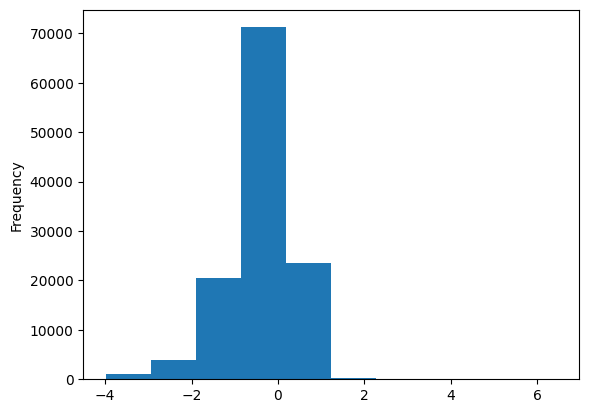

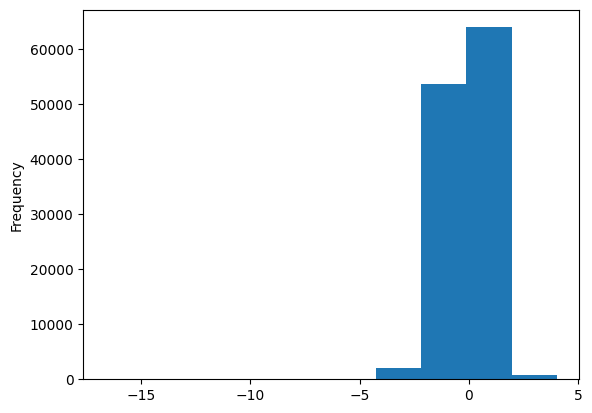

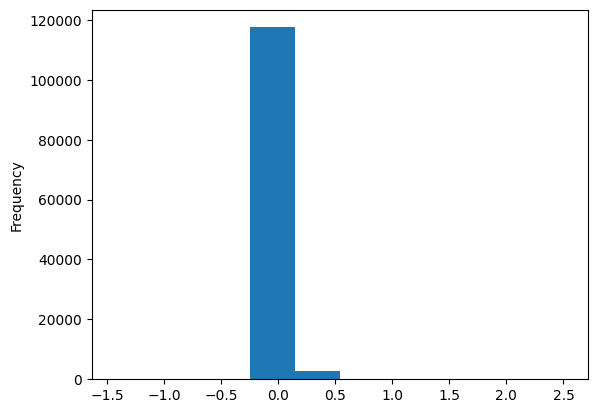

In [36]:
df['pupil_x'].plot.hist();
plt.figure()
df['pupil_y'].plot.hist();
plt.figure()
df['pupil_area'].plot.hist();

In [7]:
import seaborn as sns

In [46]:
df

pupil_area   pupil_x   pupil_y
trial time                                
1     0.01    0.151751  1.575926 -0.311330
      0.02    0.140622  1.556650 -0.254762
      0.03    0.118764  1.609951 -0.212061
      0.04    0.133770  1.574162 -0.269559
      0.05    0.154901  1.641216 -0.374031
...                ...       ...       ...
482   2.46    0.005389 -0.559866 -0.590545
      2.47    0.012414 -0.515868 -0.591621
      2.48    0.007570 -0.547747 -0.505456
      2.49    0.011894 -0.567639 -0.495012
      2.50    0.004569 -0.548885 -0.503014

[120500 rows x 3 columns]

In [47]:
df.melt()

,variable,value
0,pupil_area,0.151751
1,pupil_area,0.140622
2,pupil_area,0.118764
3,pupil_area,0.133770
4,pupil_area,0.154901
...,...,...
361495,pupil_y,-0.590545
361496,pupil_y,-0.591621
361497,pupil_y,-0.505456
361498,pupil_y,-0.495012


In [50]:
sns.displot?

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 

c:\Users\delgr\anaconda3\envs\datascience1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


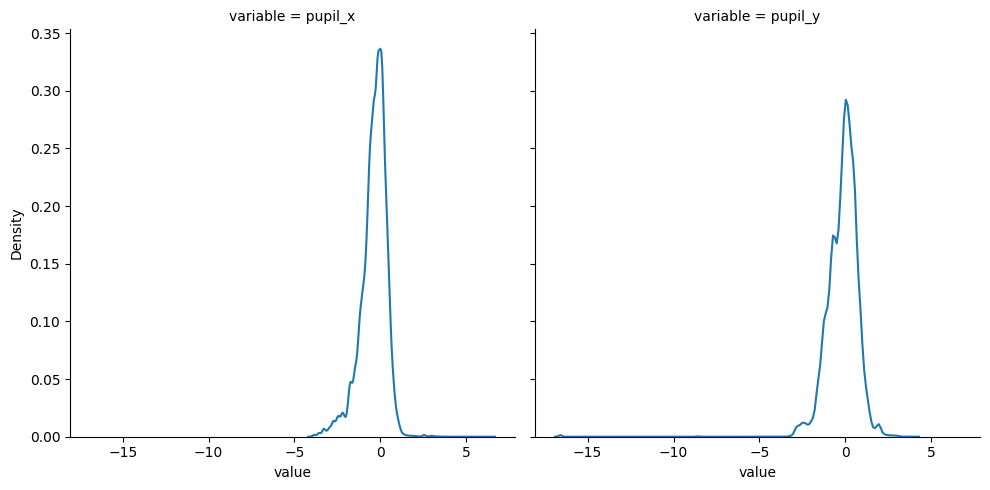

In [58]:
sns.displot(df[['pupil_x', 'pupil_y']].melt(), x="value", col="variable", kind='kde');

c:\Users\delgr\anaconda3\envs\datascience1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


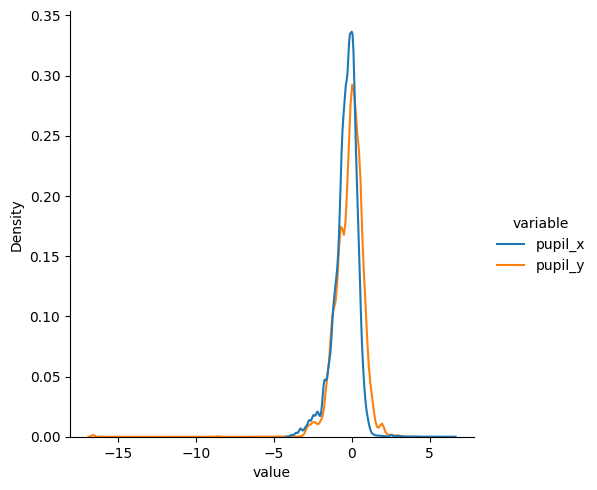

In [59]:
sns.displot(df[['pupil_x', 'pupil_y']].melt(), x="value", hue="variable", kind='kde');

c:\Users\delgr\anaconda3\envs\datascience1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


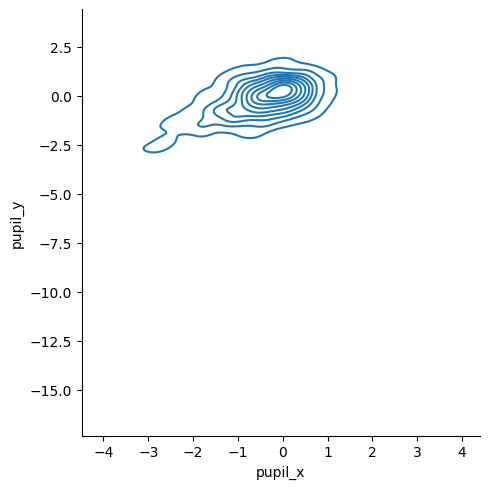

In [8]:
sns.displot(df.sample(4000), x="pupil_x", y="pupil_y", kind="kde");

In [9]:
df

pupil_area   pupil_x   pupil_y
trial time                                
1     0.01    0.151751  1.575926 -0.311330
      0.02    0.140622  1.556650 -0.254762
      0.03    0.118764  1.609951 -0.212061
      0.04    0.133770  1.574162 -0.269559
      0.05    0.154901  1.641216 -0.374031
...                ...       ...       ...
482   2.46    0.005389 -0.559866 -0.590545
      2.47    0.012414 -0.515868 -0.591621
      2.48    0.007570 -0.547747 -0.505456
      2.49    0.011894 -0.567639 -0.495012
      2.50    0.004569 -0.548885 -0.503014

[120500 rows x 3 columns]

### Split dataset: Pure left and Pure Right trials

In [12]:
df = dat[['contrast_left', 'contrast_right', 'pupil_x', 'pupil_y']].to_dataframe()
df

contrast_left  contrast_right   pupil_x   pupil_y
trial time                                                   
1     0.01            100              25  1.575926 -0.311330
      0.02            100              25  1.556650 -0.254762
      0.03            100              25  1.609951 -0.212061
      0.04            100              25  1.574162 -0.269559
      0.05            100              25  1.641216 -0.374031
...                   ...             ...       ...       ...
482   2.46              0             100 -0.559866 -0.590545
      2.47              0             100 -0.515868 -0.591621
      2.48              0             100 -0.547747 -0.505456
      2.49              0             100 -0.567639 -0.495012
      2.50              0             100 -0.548885 -0.503014

[120500 rows x 4 columns]

In [39]:
query_left = (df['contrast_left'] == 100) & (df['contrast_right'] == 0)
query_right = (df['contrast_left'] == 0) & (df['contrast_right'] == 100)
dd = df[query_left | query_right ].copy()
dd['TrialType'] = 'Right'
dd.loc[dd['contrast_left'] == 100, "TrialType"] = "Left"
dd[['contrast_left', 'contrast_right']].value_counts()

contrast_left  contrast_right
0              100               21250
100            0                 15500
Name: count, dtype: int64

c:\Users\delgr\anaconda3\envs\datascience1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


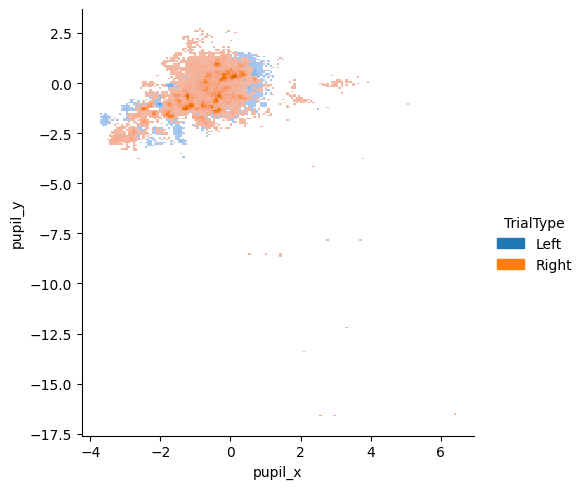

In [30]:
sns.displot(dd, x="pupil_x", y="pupil_y", hue="TrialType");

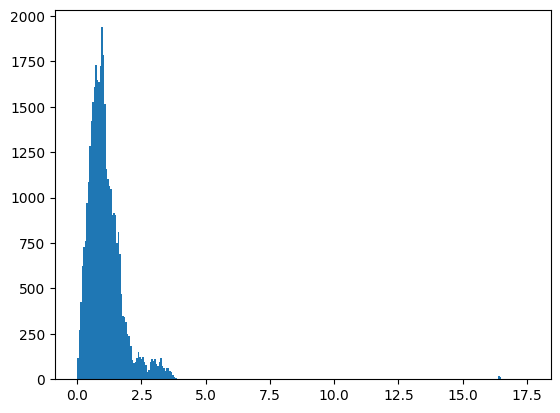

In [54]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(np.linalg.norm(dd[['pupil_x', 'pupil_y']] - dd[['pupil_x', 'pupil_y']].mean(), axis=1), bins=300);

c:\Users\delgr\anaconda3\envs\datascience1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


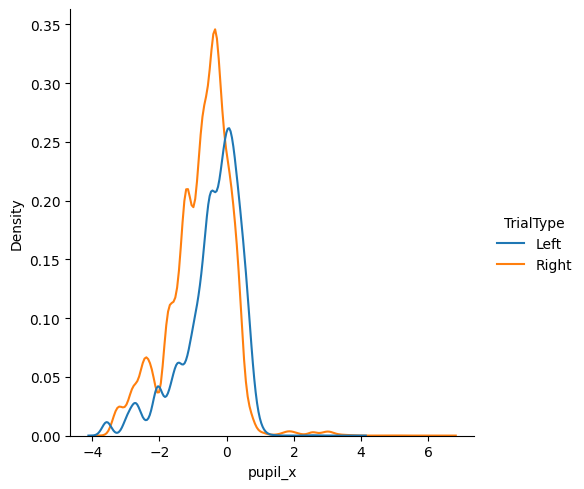

In [33]:
sns.displot(dd, x="pupil_x", hue="TrialType", kind="kde");

In [43]:
%pip install pingouin

     ---------------------------------------- 0.0/198.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/198.6 kB ? eta -:--:--
     ----- ------------------------------- 30.7/198.6 kB 325.1 kB/s eta 0:00:01
     -------------------- --------------- 112.6/198.6 kB 930.9 kB/s eta 0:00:01
     -------------------------------------- 198.6/198.6 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
      --------------------------------------- 0.1/9.2 MB 4.3 MB/s eta 0:00:03
      --------------------------------------- 0.2/9.2 MB 3.5 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 4.5 MB/s eta 0:00:02
     -- ------------------------------------- 0.5/9.2 MB 3.4 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/9.2 MB 3.7 MB/s eta 0:00:03
     ---- ----------------------------------- 1.0/9.2 MB 3.6 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/9.2 MB 3.4 MB/s eta 0:00

In [42]:
from scipy import stats

In [ ]:
pingouin.ttest(df, )

c:\Users\delgr\anaconda3\envs\datascience1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


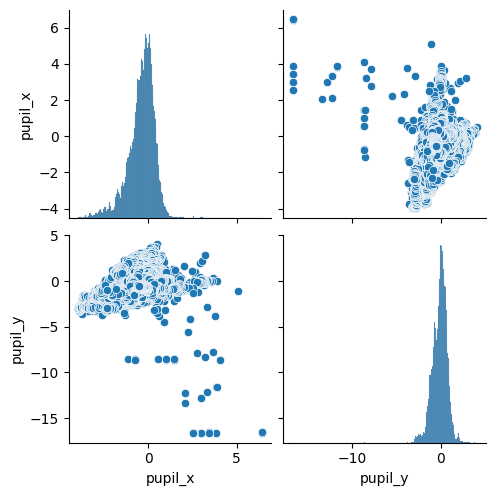

In [57]:
sns.pairplot(df[['pupil_x', 'pupil_y']]);